In [12]:
import pickle
import os
import math

filenames = ['chance0.9', 'chance0.9_2', 'chance0.9_3',
             'chance0.8_run1', 'chance0.8_run2', 'chance0.8_run3',
             'chance0.7_run1', 'chance0.7_run2', 'chance0.7_run3',
             '0.6 first run', '0.6 second run', '0.6 third run',
             'chance0.5_run1', 'chance0.5_run2', 'chance0.5_run3']

chances = [0.9, 0.8, 0.7, 0.6, 0.5]
hist_data = dict()

with open(os.path.join(os.getcwd(), f'runs\\chance1.0.pkl'), 'rb') as file:
        hist_data[1.0] = pickle.load(file)

for i, filename in enumerate(filenames):
    with open(os.path.join(os.getcwd(), f'runs\\{filename}.pkl'), 'rb') as file:
        chance = chances[math.floor(i / 3)]
        if not chance in hist_data:
            hist_data[chance] = []
        hist_data[chance].append(pickle.load(file))

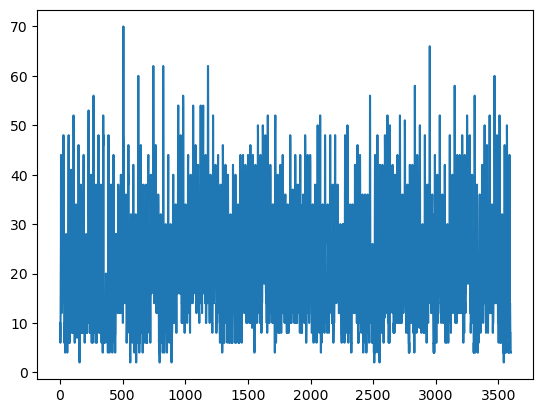

In [17]:
import matplotlib.pyplot as plt
import numpy as np

hist_counts_np = np.array(hist_data[0.9][0])
fig, ax = plt.subplots()
x = range(len(hist_counts_np))
y = hist_counts_np[:, 2]

ax.plot(x,y)
plt.show()